<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/Capstone_Project_(Full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Problem Statement

The hospitals are evaluating the effeciency of insulin based treatment for patients. 
Recommend  if solo insulin treatments works well towards the above stated objective.
For a new patient, given his medical history anc characteristics, should we recommend solo insulin or a conjuction with other drugs/treatment

# Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Reading the xlsx file of the diabetic data.
dfd=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/diabetic_data.xlsx') #readmitted is the target column

In [7]:
dfd.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
# Reading the xlsx file of the Admission Details data.
dfa=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/admission_details.xlsx')

In [9]:
dfa.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology
1,55629189,1,1,7,3,?,?
2,86047875,1,1,7,2,?,?
3,82442376,1,1,7,2,?,?
4,42519267,1,1,7,1,?,?


In [0]:
# Reading the xlsx file of the Diagnosis Session data.
dfds=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Diagnosis_session.xlsx')

In [11]:
dfds.head()


,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,250.83,?,?,1
1,55629189,276,250.01,255,9
2,86047875,648,250,V27,6
3,82442376,8,250.43,403,7
4,42519267,197,157,250,5


In [0]:
# Reading the xlsx file of the Patient Details data.
dfpd=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Paitent_details.xlsx')

In [13]:
dfpd.head()

,encounter_id,patient_nbr,race,gender,age,weight
0,2278392,8222157,Caucasian,Female,[0-10),?
1,149190,55629189,Caucasian,Female,[10-20),?
2,64410,86047875,AfricanAmerican,Female,[20-30),?
3,500364,82442376,Caucasian,Male,[30-40),?
4,16680,42519267,Caucasian,Male,[40-50),?


In [0]:
# Reading the xlsx file of the Lab Session data.
dfls=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Lab-session.xlsx')

In [15]:
dfls.head()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,41,0,1,0,0,0
1,149190,59,0,18,0,0,0
2,64410,11,5,13,2,0,1
3,500364,44,1,16,0,0,0
4,16680,51,0,8,0,0,0


In [0]:
# Merging the Diabetic Data and lab session Dataset
df1=pd.merge(dfd,dfls, on='encounter_id', how='inner')

In [0]:
# Merging the Admission Details and Diagnostic Session Dataset
df2=pd.merge(dfa,dfds,on='patient_nbr',how='inner')

In [18]:
df1.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0,1,0,0,0
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0


In [19]:
df2.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?,?,1
1,55629189,1,1,7,3,?,?,276,250.01,255,9
2,86047875,1,1,7,2,?,?,648,250,V27,6
3,82442376,1,1,7,2,?,?,8,250.43,403,7
4,42519267,1,1,7,1,?,?,197,157,250,5


In [0]:
df3=pd.merge(df1,dfpd,on='encounter_id',how='inner')

In [0]:
df=pd.merge(df3,df2,on='patient_nbr',how='inner')

In [22]:
df.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0,1,0,0,0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?,?,1
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,276,250.01,255,9
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,648,250,V27,6
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,8,250.43,403,7
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,197,157,250,5


In [23]:
df['payer_code'].value_counts()

MC    381396
?     280096
HM    104857
BC     79047
SP     76779
MD     63234
OG     59973
UN     19406
CM     18941
DM     18192
CP     15922
OT      2529
PO      2439
MP      2108
SI       583
CH       469
WC       276
FR         1
Name: payer_code, dtype: int64

In [0]:
sns.pairplot(df,diag_kind='kde')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fce6d902c80> (for post_execute):


KeyboardInterrupt: ignored

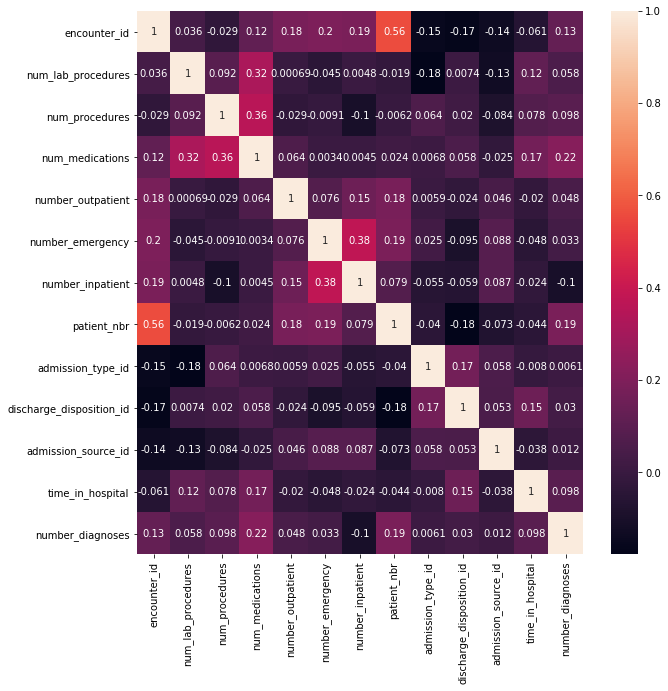

In [24]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
print(df.shape)

(1126248, 50)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126248 entries, 0 to 1126247
Data columns (total 50 columns):
encounter_id                1126248 non-null int64
max_glu_serum               1126248 non-null object
A1Cresult                   1126248 non-null object
metformin                   1126248 non-null object
repaglinide                 1126248 non-null object
nateglinide                 1126248 non-null object
chlorpropamide              1126248 non-null object
glimepiride                 1126248 non-null object
acetohexamide               1126248 non-null object
glipizide                   1126248 non-null object
glyburide                   1126248 non-null object
tolbutamide                 1126248 non-null object
pioglitazone                1126248 non-null object
rosiglitazone               1126248 non-null object
acarbose                    1126248 non-null object
miglitol                    1126248 non-null object
troglitazone                1126248 non-null object
tola

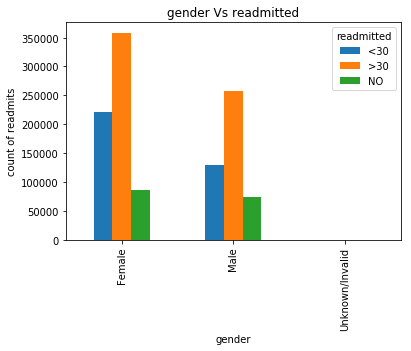

In [27]:
pd.crosstab(df.gender,df.readmitted).plot(kind='bar')
plt.title('gender Vs readmitted')
plt.xlabel('gender')
plt.ylabel('count of readmits')
plt.savefig('gender vs readmitted')

In [28]:
# Descriptive Statistics
df.describe()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses
count,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06,1.126248e+06
mean,1.786371e+08,4.301785e+01,1.031062e+00,1.679342e+01,6.942796e-01,1.139548e+00,3.350469e+00,5.631067e+07,1.792291e+00,3.624377e+00,6.215489e+00,4.588655e+00,7.685632e+00
std,9.688547e+07,1.939416e+01,1.472304e+00,7.519531e+00,1.535356e+00,2.629082e+00,3.488118e+00,3.595611e+07,1.221059e+00,5.156400e+00,3.507199e+00,2.987227e+00,1.900500e+00
min,1.252200e+04,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.350000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.105643e+08,3.200000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.383885e+07,1.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,7.000000e+00
50%,1.681515e+08,4.400000e+01,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,4.986025e+07,1.000000e+00,1.000000e+00,7.000000e+00,4.000000e+00,9.000000e+00
75%,2.409743e+08,5.700000e+01,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,5.000000e+00,8.878589e+07,2.000000e+00,5.000000e+00,7.000000e+00,6.000000e+00,9.000000e+00
max,4.438672e+08,1.320000e+02,6.000000e+00,8.100000e+01,4.200000e+01,7.600000e+01,2.100000e+01,1.895026e+08,8.000000e+00,2.800000e+01,2.500000e+01,1.400000e+01,1.600000e+01


In [29]:
# checking the missing values
df.isnull().sum()

encounter_id                0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_eme

# Observations.

Here ,we can see that there are no null values

# Time in Hospital Vs Readmission

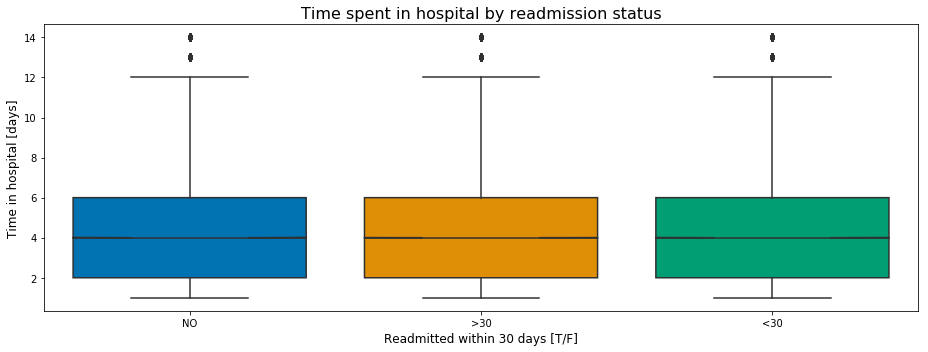

In [30]:
f = plt.figure(figsize=(13,5))
sns.boxplot(x='readmitted', y='time_in_hospital',
           data=df, palette='colorblind', saturation=1, orient='v', notch=True)
plt.ylabel('Time in hospital [days]', size=12); plt.xlabel('Readmitted within 30 days [T/F]', size=12);
plt.title('Time spent in hospital by readmission status', size=16)
plt.tight_layout()

# Plotting the target Variable 'Readmit'


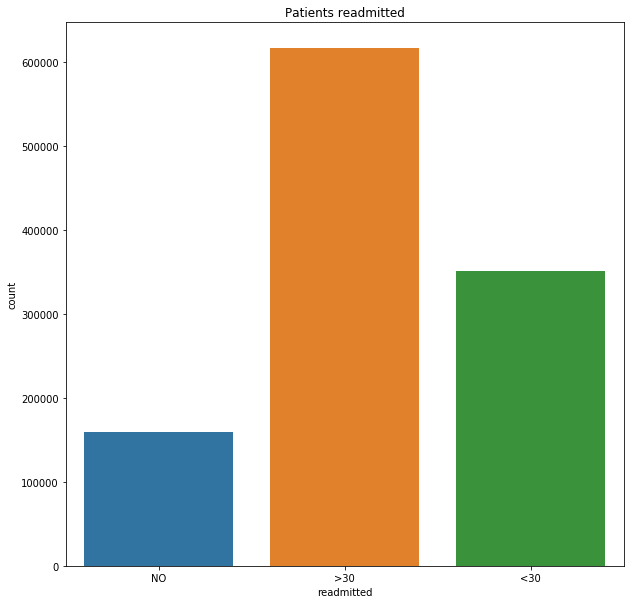

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(df.readmitted)
plt.title('Patients readmitted')
plt.show()

# Observations

The difference here is quite immediately clear - patients that were readmitted tended to spend longer in hospital. As can be seen from the boxplot below, the difference in median time spent in hospital between the two readmission classes was about a day.

In [32]:
# count the number of rows for each type
df.groupby('readmitted').size()

readmitted
<30    350572
>30    616346
NO     159330
dtype: int64

# Observations

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [33]:
# Another column that is important is discharge_disposition_id, which tells us where the patient went after the hospitalization.
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     677120
2      20031
3     135988
4       7710
5       8608
6     168788
7      16649
8       1289
9        837
10         6
11      8410
12         9
13      2691
14      2275
15       560
16       160
17       117
18     36273
19        31
20         5
22     16866
23      5015
24      1164
25     14212
27        43
28      1391
dtype: int64

In [0]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

# Observations

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model.

In [0]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

# Observations

Now let's define an output variable for our binary classification. Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge.

# Observations

Let's define a function to calculate the prevalence of population that is readmitted with 30 days.

In [0]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [37]:

print('Prevalence:%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.312


# Observations

Around 31% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below.

# To check for the Unique values

In [38]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 100228 unique values
max_glu_serum
['None' '>300' 'Norm' '>200']
A1Cresult
['None' 'Norm' '>7' '>8']
metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide
['No' 'Steady' 'Up' 'Down']
glimepiride
['No' 'Steady' 'Up' 'Down']
acetohexamide
['No' 'Steady']
glipizide
['No' 'Steady' 'Up' 'Down']
glyburide
['No' 'Steady' 'Up' 'Down']
tolbutamide
['No' 'Steady']
pioglitazone
['No' 'Steady' 'Up' 'Down']
rosiglitazone
['No' 'Steady' 'Up' 'Down']
acarbose
['No' 'Steady' 'Up' 'Down']
miglitol
['No' 'Steady' 'Down' 'Up']
troglitazone
['No' 'Steady']
tolazamide
['No' 'Steady' 'Up']
examide
['No']
citoglipton
['No']
insulin
['No' 'Up' 'Steady' 'Down']
glyburide-metformin
['No' 'Steady' 'Down' 'Up']
glipizide-metformin
['No' 'Steady']
glimepiride-pioglitazone
['No' 'Steady']
metformin-rosiglitazone
['No' 'Steady']
metformin-pioglitazone
['No' 'Steady']
change
['No' 'Ch']
diabetesMed
['No' 'Yes']
readmitted
['N

In [39]:
# To check for the missing values
for col in df.columns:
   if df[col].dtype == object:
        print(col,df[col][df[col] == '?'].count()/df[col].count()*100)

max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0
race 0.6167126153359525
gender 0.0
age 0.0
weight 99.41896200338594
payer_code 24.914632524469013
medical_specialty 47.79212750126703
diag_1 0.01087312056763081
diag_2 0.48291033000370226
diag_3 1.8938999097800575


In [0]:
# dropping the  columns which has more than 23% missing values
df=df.drop(['weight','payer_code','medical_specialty'],axis=1)

In [41]:
print(df.shape)

(1112836, 48)


In [42]:
df.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'OUTPUT_LABEL'],
      dtype='object')

In [0]:
# to drop the missing values in the row  race, diag_1,diag_2,diag_3,gender
df['race'] = df['race'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['race'])

In [0]:
df['diag_1'] = df['diag_1'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['diag_1'])

In [0]:
df['diag_2'] = df['diag_2'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['diag_2'])

In [0]:
df['diag_3'] = df['diag_3'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['diag_3'])

In [0]:

df['gender'] = df['gender'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['gender'])

In [48]:
print(df.shape)

(1084248, 48)


# Observations
variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

# Feature Engineering

In [0]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [0]:
df["Race"]= df["race"].map(lambda x:'NA' if x=='?' else x)
df.drop(['race'], axis=1, inplace= True)

In [0]:
def get_fn(row):
    if row['admission_type_id']==1 or row['admission_type_id']==2 or row['admission_type_id']==7 :
        return "Non ELective"
    elif row['admission_type_id']==3 or row['admission_type_id']==4:
        return "Elective"
    else :
        return "NA"
df['admission_type']= df.apply(get_fn,axis=1)
df.drop(['admission_type_id'], axis=1, inplace= True)

# Observations

admission_type_ids 1,2,7 are grouped as Non-Elective category 3,4 as Elective category and other ids which fall under missing information are grouped as 'NA'

In [0]:
def fun(z):
    if z =='None' or z=='Norm':
        return 1
    else :
        return 0
df['A1C']= df['A1Cresult'].map(fun)
df.drop(['A1Cresult'], axis=1, inplace= True)

# Observartions

'None' & 'Norm' of A1C is 0 and >8,>7 is 1.

In [0]:
def gt_ag(a):
    if a =='[0-10)' or a=='[10-20)' or a=='[20-30)':
        return 'young'
    elif a =='[30-40)' or a=='[40-50)' or a=='[50-60)':
        return 'mid'
    else:
        return'old'
df['Age']= df['age'].map(gt_ag)
df.drop(['age'], axis=1, inplace= True)

# Observations 
Dividing age groups in to three categories 'young','mid','old'

In [54]:
df['max_glu_serum'].value_counts()

None    1010310
>300      35609
Norm      24561
>200      13768
Name: max_glu_serum, dtype: int64

In [0]:
df['max_glu_serum']=df['max_glu_serum'].replace('None',0)
df['max_glu_serum']=df['max_glu_serum'].replace('Norm',0)
df['max_glu_serum']=df['max_glu_serum'].replace('>200',1)
df['max_glu_serum']=df['max_glu_serum'].replace('>300',1)

# Observations

'None' & 'Norm' of max_glu_serum is 0 and >200,>300 is 1

In [0]:
def dp_id(a):
    if a ==6 or a==8 or a==9 or a==13 or a==1:
        return 'Discharged Home'
    elif a==18 or a ==25 or a==26 :
        return 'NA'
    else:
        return'Discharged/Transferred'
df['discharge']= df['discharge_disposition_id'].map(dp_id)
df.drop(['discharge_disposition_id'], axis=1, inplace= True)

In [57]:
df.readmitted.value_counts()

>30    600191
<30    333764
NO     150293
Name: readmitted, dtype: int64

# Observations

The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results.

In [0]:
df = df[(df.diag_1 != '?') | (df.diag_2 != '?') | (df.diag_3 != '?')]

In [0]:
# Creating additional columns for diagnosis
df['d1'] = df['diag_1']
df['d2'] = df['diag_2']
df['d3'] = df['diag_3']


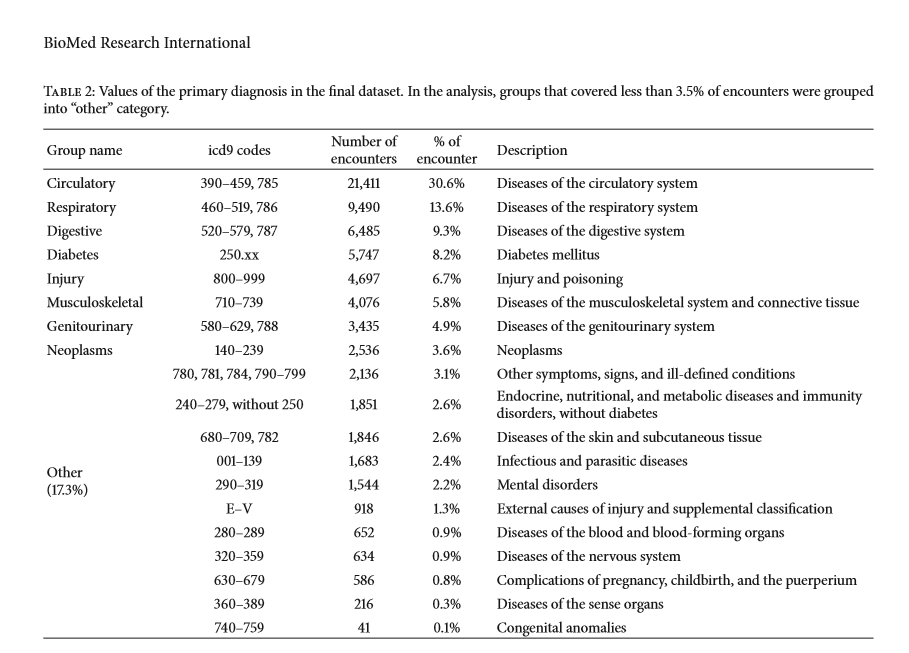

In [60]:
# Inserting the images to classify The diagnosis
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/__results___20_0.png')

# Observations

I was concerned about how weak each of the ICD9 diagnoses would be as one-hot encoded features - there simply weren't enough entries for most values to make an informed decision about whether they were influencing readmission. Instead, I aggregated the diagnoses under a broader class in accordance with the type of health problems each range of values relates to.

In [0]:

def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [0]:

df['d1'] = ICD9_classifier(df.diag_1.values)
df['d2'] = ICD9_classifier(df.diag_2.values)
df['d3'] = ICD9_classifier(df.diag_3.values)

In [63]:
print(df.shape)

(1084248, 52)


In [64]:
df.head()

,encounter_id,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,gender,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,number_diagnoses,OUTPUT_LABEL,service_utilization,Race,admission_type,A1C,Age,discharge,d1,d2,d3
1,149190,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0,55629189,Female,7,3,276,250.01,255,9,0,0,Caucasian,Non ELective,1,young,Discharged Home,Hormonal,Hormonal,Hormonal
2,64410,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1,86047875,Female,7,2,648,250,V27,6,0,3,AfricanAmerican,Non ELective,1,young,Discharged Home,Childbirth,Hormonal,Accidental
3,500364,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0,82442376,Male,7,2,8,250.43,403,7,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Infectious,Hormonal,Circulatory
4,16680,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0,42519267,Male,7,1,197,157,250,5,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Neoplasmic,Neoplasmic,Hormonal
5,35754,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,31,6,16,0,0,0,82637451,Male,2,3,414,411,250,9,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Circulatory,Circulatory,Hormonal


In [0]:
df = df[df.gender != 'Unknown/Invalid']

In [0]:
df=df.drop(['encounter_id','patient_nbr'],axis=1)

In [0]:
df.drop(['chlorpropamide','acetohexamide', 'tolbutamide', 'rosiglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'],axis=1, inplace= True)

In [68]:
print(df.shape)

(1084247, 36)


# Dummification



# Observations

Creating dummy encoded columns for categorical variables

To avoid dummy variable trap i.e., scenario of highly correlated independent variables we have to drop one of the created dummy variable. The Original column should also be dropped as we have dummies

In [0]:
dummy_metformin = pd.get_dummies(df['metformin'], prefix='metformin')
df= df.join(dummy_metformin.drop("metformin_No", axis=1))
df.drop(['metformin'], axis=1, inplace= True)

In [0]:
dummy_repaglinide = pd.get_dummies(df['repaglinide'], prefix='repaglinide')
df= df.join(dummy_repaglinide.drop("repaglinide_No", axis=1))
df.drop(['repaglinide'], axis=1, inplace= True)

In [0]:
dummy_insulin = pd.get_dummies(df['insulin'], prefix='insulin')
df= df.join(dummy_insulin.drop("insulin_No", axis=1))
df.drop(['insulin'], axis=1, inplace= True)

In [0]:
dummy_nateglinide = pd.get_dummies(df['nateglinide'], prefix='nateglinide')
df= df.join(dummy_nateglinide.drop("nateglinide_No", axis=1))
df.drop(['nateglinide'], axis=1, inplace= True)

In [0]:
dummy_glimepiride = pd.get_dummies(df['glimepiride'], prefix='glimepiride')
df= df.join(dummy_glimepiride.drop("glimepiride_No", axis=1))
df.drop(['glimepiride'], axis=1, inplace= True)

In [0]:
dummy_glipizide = pd.get_dummies(df['glipizide'], prefix='glipizide')
df= df.join(dummy_glipizide.drop("glipizide_No", axis=1))
df.drop(['glipizide'], axis=1, inplace= True)

In [0]:
dummy_glyburide = pd.get_dummies(df['glyburide'], prefix='glyburide')
df= df.join(dummy_glyburide.drop("glyburide_No", axis=1))
df.drop(['glyburide'], axis=1, inplace= True)

In [0]:
dummy_pioglitazone = pd.get_dummies(df['pioglitazone'], prefix='pioglitazone')
df= df.join(dummy_pioglitazone.drop("pioglitazone_No", axis=1))
df.drop(['pioglitazone'], axis=1, inplace= True)

In [0]:
dummy_acarbose = pd.get_dummies(df['acarbose'], prefix='acarbose')
df= df.join(dummy_acarbose.drop("acarbose_No", axis=1))
df.drop(['acarbose'], axis=1, inplace= True)

In [0]:
dummy_gender = pd.get_dummies(df['gender'], prefix='gender')
df= df.join(dummy_gender.drop("gender_Female", axis=1))
df.drop(['gender'], axis=1, inplace= True)

In [0]:
dummy_admission = pd.get_dummies(df['admission_type'], prefix='admission')
df= df.join(dummy_admission.drop("admission_NA", axis=1))
df.drop(['admission_type'], axis=1, inplace= True)

In [0]:
dummy_change = pd.get_dummies(df['change'], prefix='change')
df= df.join(dummy_change.drop("change_Ch", axis=1))
df.drop(['change'], axis=1, inplace= True)

In [0]:
dummy_Age = pd.get_dummies(df['Age'], prefix='Age')
df= df.join(dummy_Age.drop("Age_mid", axis=1))
df.drop(['Age'], axis=1, inplace= True)

In [0]:
dummy_diabetesMed = pd.get_dummies(df['diabetesMed'], prefix='diabetesMed')
df= df.join(dummy_diabetesMed.drop("diabetesMed_No", axis=1))
df.drop(['diabetesMed'], axis=1, inplace= True)

In [0]:
dummy_race = pd.get_dummies(df['Race'], prefix='Race')
df= df.join(dummy_race.drop("Race_Other", axis=1))
df.drop(['Race'], axis=1, inplace= True)

In [84]:
df.discharge.value_counts()

Discharged Home           823511
Discharged/Transferred    210782
NA                         49954
Name: discharge, dtype: int64

In [0]:
dummy_discharge = pd.get_dummies(df['discharge'], prefix='discharge')
df= df.join(dummy_discharge.drop("discharge_NA", axis=1))
df.drop(['discharge'], axis=1, inplace= True)

In [86]:
df.head()

,max_glu_serum,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,number_diagnoses,OUTPUT_LABEL,service_utilization,A1C,d1,d2,d3,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,insulin_Down,insulin_Steady,insulin_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,gender_Male,admission_Elective,admission_Non ELective,change_No,Age_old,Age_young,diabetesMed_Yes,Race_AfricanAmerican,Race_Asian,Race_Caucasian,Race_Hispanic,discharge_Discharged Home,discharge_Discharged/Transferred
1,0,>30,59,0,18,0,0,0,7,3,276,250.01,255,9,0,0,1,Hormonal,Hormonal,Hormonal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0
2,0,NO,11,5,13,2,0,1,7,2,648,250,V27,6,0,3,1,Childbirth,Hormonal,Accidental,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0
3,0,NO,44,1,16,0,0,0,7,2,8,250.43,403,7,0,0,1,Infectious,Hormonal,Circulatory,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
4,0,NO,51,0,8,0,0,0,7,1,197,157,250,5,0,0,1,Neoplasmic,Neoplasmic,Hormonal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
5,0,>30,31,6,16,0,0,0,2,3,414,411,250,9,0,0,1,Circulatory,Circulatory,Hormonal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0


In [0]:
df.drop(['diag_1','diag_2','diag_3'], axis=1, inplace= True)

In [0]:
# Dummies of the categorical variables

df=pd.get_dummies(df,prefix=['d1','d2','d3'],columns=['d1','d2','d3'])

In [89]:
df.head()

,max_glu_serum,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,admission_source_id,time_in_hospital,number_diagnoses,OUTPUT_LABEL,service_utilization,A1C,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,insulin_Down,insulin_Steady,insulin_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,acarbose_Down,acarbose_Steady,...,d1_Neoplasmic,d1_Nervous,d1_Respiratory,d1_Sensory,d2_Accidental,d2_Blood,d2_Childbirth,d2_Circulatory,d2_Congenital,d2_Dermatological,d2_Digestive,d2_Genitourinary,d2_Hormonal,d2_Infectious,d2_Injury,d2_Mental,d2_Miscellaneous,d2_Musculoskeletal,d2_Neoplasmic,d2_Nervous,d2_Respiratory,d2_Sensory,d3_Accidental,d3_Blood,d3_Childbirth,d3_Circulatory,d3_Congenital,d3_Dermatological,d3_Digestive,d3_Genitourinary,d3_Hormonal,d3_Infectious,d3_Injury,d3_Mental,d3_Miscellaneous,d3_Musculoskeletal,d3_Neoplasmic,d3_Nervous,d3_Respiratory,d3_Sensory
1,0,>30,59,0,18,0,0,0,7,3,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,NO,11,5,13,2,0,1,7,2,6,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,NO,44,1,16,0,0,0,7,2,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,NO,51,0,8,0,0,0,7,1,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,>30,31,6,16,0,0,0,2,3,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
X=df.drop('readmitted',axis=1)
y=df['readmitted']


In [0]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 

In [0]:
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=GaussianNB()
rfc_model=RandomForestClassifier(n_estimators=10,max_depth=25,min_samples_split=3)
bg=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()


In [0]:
models = []
models.append(('Decision Tree Classifier', dtree))
models.append(('Random Forrest Classifer', rfc))
models.append(('K Neighbors Classifer', knn))
models.append(('Naive Bayes Classifer', nb))
models.append(('Random Forrest Classifier with Estimators 10',rfc_model))
models.append(('Bagging Classifer', bg))
models.append(('Ada Boost Classifer', adb))
models.append(('Gradient Boosting Classifer', gbc))
models.append(('XGBoost Classifer', xgb))


Decision Tree Classifier: 0.719755 (0.001257)
Random Forrest Classifer: 0.809859 (0.001258)
K Neighbors Classifer: 0.502262 (0.000566)
Naive Bayes Classifer: 0.818932 (0.001296)
Random Forrest Classifier with Estimators 10: 0.839716 (0.001549)
Bagging Classifer: 0.795132 (0.000874)
Ada Boost Classifer: 0.857274 (0.001692)
Gradient Boosting Classifer: 0.860473 (0.001646)
XGBoost Classifer: 0.860796 (0.001631)


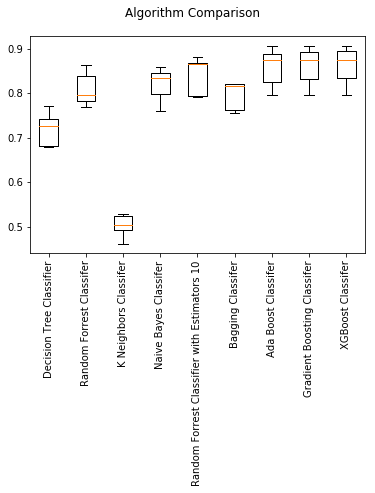

In [94]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

# Grid Search and Randomised Search

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [0]:
# Grid Search for The Decision Tree
param={'criterion':['entropy','gini'],'max_depth':np.arange(1,10),'max_features':np.arange(1,50)}
G=GridSearchCV(dtree,param,cv=5,scoring='accuracy') 
print(G.fit(X,y)) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
   

In [0]:
G.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 31}

In [0]:
# Grid Search for The RAndom Forrest
param={'criterion':['entropy','gini'],'max_depth':np.arange(1,10),'max_features':np.arange(1,25)}
G1=GridSearchCV(rfc,param,cv=5,scoring='accuracy') 
print(G1.fit(X,y)) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
G1.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 21}

In [0]:
# Grid Search for Bagging classifier
param={'n_estimators':np.arange(1,25),'max_samples':np.arange(1,10),'max_features':np.arange(1,10)}
G3=GridSearchCV(bg,param,cv=5,scoring='accuracy') 
print(G3.fit(X,y)) 

In [0]:
G3.best_params_

In [0]:
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features=31)
rfc1=RandomForestClassifier(criterion='entropy',max_depth=2,max_features=21)
knn1

In [0]:
models1 = []
models1.append(('Decision Tree Classifier : Criterion Entropy, Max Depth 2 and Max Features 31', dtree1))
models1.append(('Random Forrest Classifier : Criterion Entropy, Max Depth 2 and Max Features 21', rfc1))
models1.append(('K Nearest Neighbors Classifier : Neighbors Entropy and Weights 21', rfc1))

Decision Tree Classifier : Criterion Entropy, Max Depth 2 and Max Features 31: 0.680997 (0.014068)
Random Forrest Classifier : Criterion Entropy, Max Depth 2 and Max Features 21: 0.851819 (0.003170)


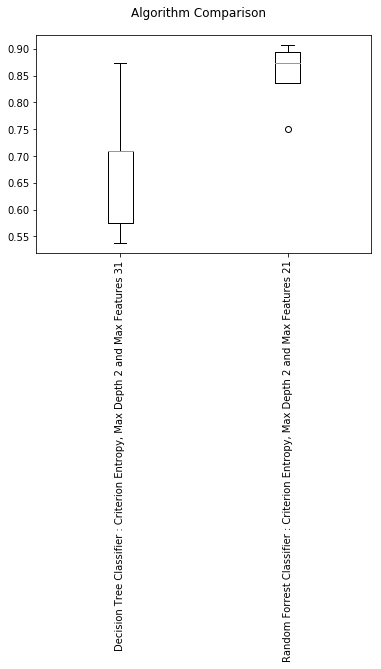

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models1:
	kfold = model_selection.KFold(n_splits=5,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

#AUTO ML

In [0]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(df,test_size=0.3) 

In [98]:
pip install h2o

     |████████████████████████████████| 123.6MB 156kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.3-py2.py3-none-any.whl size=123649955 sha256=33ad28dd4eb247a6610ace99d6953206026f95c4087216fe0b5ba9c7c3f34a31
  Stored in directory: /root/.cache/pip/wheels/4a/a6/8d/0880c51d5aa9746a87f61d9b66d8a98e7b9cf400c81ffc944e
Successfully built h2o


In [0]:
import h2o

In [0]:
from h2o.automl import H2OAutoML

In [101]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbpz2_d89
  JVM stdout: /tmp/tmpbpz2_d89/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbpz2_d89/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_unknownUser_0414df
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [102]:
train=h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [103]:
test=h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
x = train.columns
y = "readmitted"
x.remove(y)

In [0]:
train["readmitted"] = train["readmitted"].asfactor()
test["readmitted"] = test["readmitted"].asfactor()

In [106]:
aml = H2OAutoML(max_models=10, seed=123)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [107]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_20190903_080310,0.280326,0.297979,0.302499,0.0915055


In [108]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20190903_080310


Model Summary: 

,,number_of_trees
0,,77.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.08880403565419691
RMSE: 0.298000059822472
LogLoss: 0.2876287765475306
Mean Per-Class Error: 0.2768472669540895

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,<30,>30,NO,Error,Rate
0,233660.0,0.0,0.0,0.000000,"0 / 233,660"
1,0.0,418043.0,2001.0,0.004764,"2,001 / 420,044"
2,0.0,86928.0,18340.0,0.825778,"86,928 / 105,268"
3,233660.0,504971.0,20341.0,0.117170,"88,929 / 758,972"



Top-3 Hit Ratios: 

,k,hit_ratio
0,1,0.88283
1,2,1.00000
2,3,1.00000



ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.09150552004002138
RMSE: 0.30249879345217456
LogLoss: 0.29797935185253266
Mean Per-Class Error: 0.28032605838714997

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,<30,>30,NO,Error,Rate
0,233660.0,0.0,0.0,0.000000,"0 / 233,660"
1,0.0,417853.0,2191.0,0.005216,"2,191 / 420,044"
2,0.0,87979.0,17289.0,0.835762,"87,979 / 105,268"
3,233660.0,505832.0,19480.0,0.118805,"90,170 / 758,972"



Top-3 Hit Ratios: 

,k,hit_ratio
0,1,0.881195
1,2,1.000000
2,3,1.000000



Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8811946,0.0021996677,0.8799631,0.87928456,0.88155,0.8803312,0.88484395
1,err,0.11880543,0.0021996677,0.12003689,0.12071544,0.11845001,0.11966876,0.11515607
2,err_count,18034.0,333.93936,18221.0,18324.0,17980.0,18165.0,17480.0
3,logloss,0.29797933,0.018350912,0.30480912,0.3118658,0.3030762,0.30441704,0.2657284
4,max_per_class_error,0.8357286,0.015279475,0.8428301,0.8431225,0.8398237,0.8443102,0.8085563
5,mean_per_class_accuracy,0.719685,0.00488862,0.7174189,0.71738714,0.71828675,0.7169455,0.7283867
6,mean_per_class_error,0.280315,0.00488862,0.2825811,0.2826129,0.28171325,0.2830545,0.27161333
7,mse,0.09150551,0.004447145,0.09329446,0.09510183,0.09247177,0.09290524,0.08375427
8,r2,0.7810576,0.010570186,0.777315,0.7735635,0.7781502,0.7765481,0.7997112
9,rmse,0.30242518,0.0074604056,0.3054414,0.30838585,0.30409172,0.3048036,0.28940332



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2019-09-03 08:52:24,49 min 14.250 sec,0.0,0.666667,1.098612,0.446562
1,,2019-09-03 08:52:55,49 min 44.613 sec,5.0,0.598443,0.914500,0.127094
2,,2019-09-03 08:53:20,50 min 10.272 sec,10.0,0.529524,0.757969,0.125864
3,,2019-09-03 08:53:46,50 min 35.564 sec,15.0,0.475227,0.648228,0.125233
4,,2019-09-03 08:54:11,51 min 0.504 sec,20.0,0.433370,0.568105,0.124633
5,,2019-09-03 08:54:35,51 min 25.154 sec,25.0,0.398055,0.501666,0.124177
6,,2019-09-03 08:55:02,51 min 51.600 sec,30.0,0.375435,0.458544,0.123580
7,,2019-09-03 08:55:28,52 min 17.517 sec,35.0,0.354835,0.417849,0.122900
8,,2019-09-03 08:55:56,52 min 45.501 sec,40.0,0.340871,0.389206,0.121564
9,,2019-09-03 08:56:23,53 min 13.126 sec,45.0,0.329619,0.364593,0.121144



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,OUTPUT_LABEL,5.125942e+06,1.000000,0.810039
1,service_utilization,1.669762e+05,0.032575,0.026387
2,num_lab_procedures,1.663113e+05,0.032445,0.026282
3,number_inpatient,1.457810e+05,0.028440,0.023037
4,num_medications,1.398588e+05,0.027285,0.022102
5,number_emergency,7.876360e+04,0.015366,0.012447
6,num_procedures,6.490507e+04,0.012662,0.010257
7,number_outpatient,5.334948e+04,0.010408,0.008431
8,Age_old,3.760682e+04,0.007337,0.005943
9,admission_source_id,3.123258e+04,0.006093,0.004936



See the whole table with table.as_data_frame()


In [109]:
preds = aml.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [110]:
preds = aml.leader.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [111]:
preds

predict,<30,>30,NO
>30,0.0374721,0.765681,0.196847
>30,0.0325058,0.742195,0.2253
>30,0.0178119,0.959335,0.0228529
>30,0.0335943,0.751313,0.215093
>30,0.0222384,0.885635,0.0921264
>30,0.0358177,0.723604,0.240578
<30,0.981196,0.0097611,0.0090428
<30,0.982015,0.00943956,0.00854518
>30,0.0152139,0.969594,0.0151924
<30,0.968763,0.0160695,0.015167
